# Q-6 WAP to implement KNN from scratch as well as using library and find optimal value of K using Elbow method. Experiment using different types of distance measures.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode
from sklearn import datasets

In [2]:
K,M=datasets.make_blobs(n_samples=250,centers=None, n_features=2, random_state=42)

In [3]:
data=pd.DataFrame(K,columns=["Group1","Group2"])
data["Target"] =M

In [4]:
data

,Group1,Group2,Target
0,-1.593796,9.343037,0
1,4.154515,2.055044,1
2,5.722930,3.026972,1
3,-1.545821,9.427067,0
4,-7.778042,-6.388190,2
...,...,...,...
245,4.813060,2.358487,1
246,4.853973,0.727431,1
247,-2.409546,8.510810,0
248,-7.638760,-6.729716,2


In [5]:
def knn(point,data):
    distance=[]
    for i in data:
        sumn=0
        for j in range(len(data[0])):
            sumn+=(i[j]-point[j])**2
        distance.append(np.sqrt(sumn))
    return distance

dis=knn((0,0),K)
data1=data.copy()
data1["Distance"]=dis
data1.sort_values('Distance',inplace=True)
data1.head(10)

,Group1,Group2,Target,Distance
38,1.398611,0.948782,1,1.690060
48,2.614736,2.159624,1,3.391286
194,3.262209,1.035345,1,3.422565
128,3.120509,1.488936,1,3.457529
55,3.633861,0.758981,1,3.712277
161,3.439582,1.638668,1,3.809982
26,3.793085,0.458322,1,3.820675
130,3.810884,1.412989,1,4.064403
63,3.814382,1.651784,1,4.156669
94,3.712948,1.913644,1,4.177083


In [6]:
k=9
a=data1["Target"][:k].values
print("Class : ",mode(a))

Class :  1


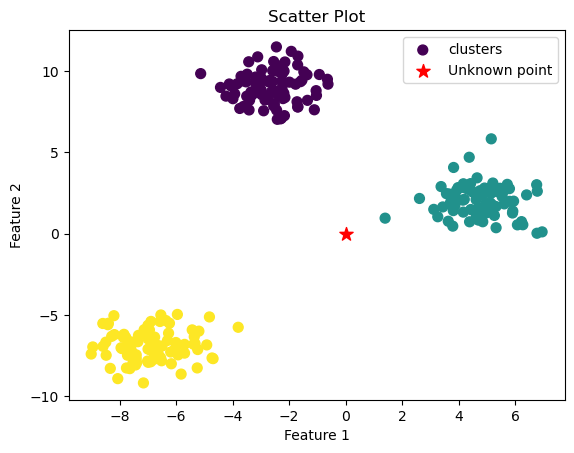

In [7]:
plt.title("Scatter Plot")
plt.scatter(K[:,0],K[:,1],c=M,cmap='viridis', s=50)
plt.scatter(0,0,marker="*",color="red",s=100,label="Unknown point")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(("clusters","Unknown point"))
plt.show()

In [8]:
from sklearn.cluster import KMeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 1.0, 'Elbow Method for Optimal Number of Clusters')

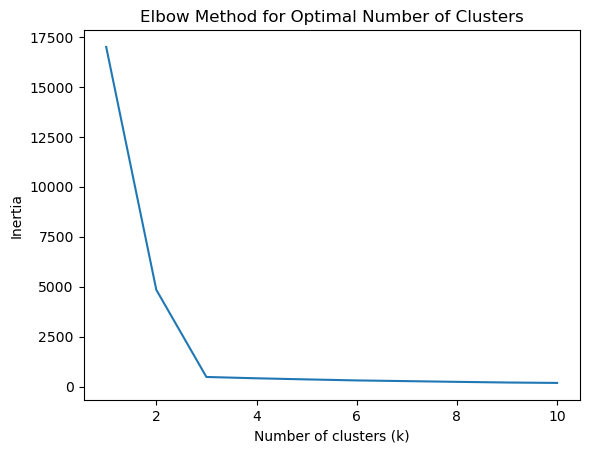

In [9]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(data, M, test_size=0.33, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
error=[]
for i in range(1,10):
    KM=KNeighborsClassifier(n_neighbors=i)
    KM.fit(xtrain,ytrain)
    prediction=KM.predict(xtest)
    error.append(np.mean(prediction != ytest))

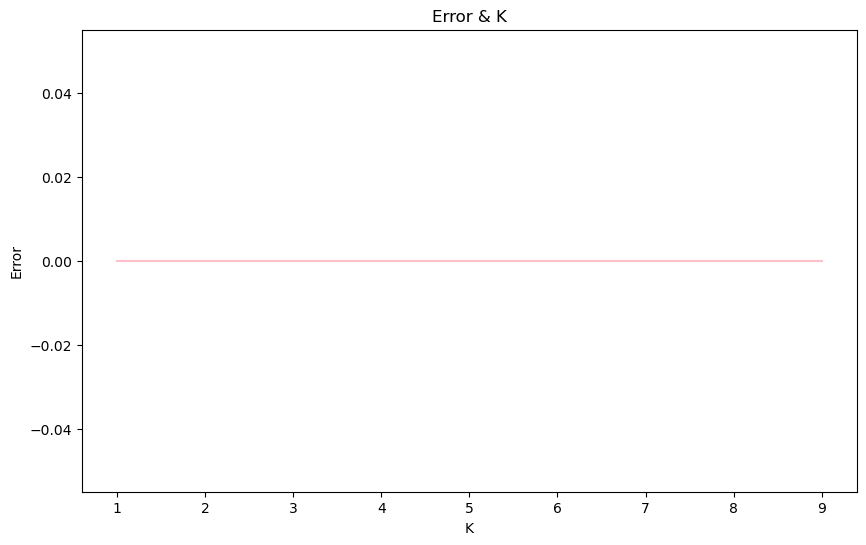

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error,color='pink')
plt.title("Error & K")
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [15]:
MK=KNeighborsClassifier(n_neighbors=3)
MK.fit(xtrain,ytrain)
predicted=MK.predict(xtest)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        30

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



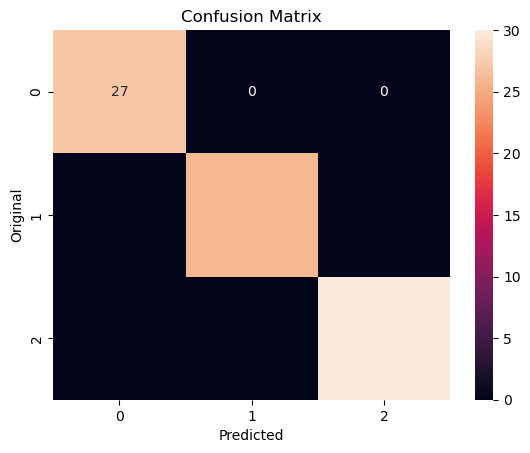

In [18]:
sns.heatmap(confusion_matrix(ytest,predicted),annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Original")
plt.show()

In [19]:
accuracy_score(ytest,predicted)

1.0